##  Rate of penetration (ROP) prediction 
Rate of penetration (ROP) forecast in drilling operations is a crucial task for the oil and gas industry. Accurate prediction of ROP can significantly improve the efficiency of drilling operations, reduce costs, and optimize the performance of the drilling process. However, forecasting ROP is a challenging task due to the complexity of the drilling process, the variability of the geological formations, and the presence of measurement errors.

## **Exploratory data analysis**


In [5]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope

In [2]:
# Loading the data
df = pd.read_csv("ROP_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Depth (ft)            7311 non-null   float64
 1   ROP (ft/hr)           7311 non-null   float64
 2   WOB (k-lbs)           7311 non-null   float64
 3   Temp Out (degF)       7311 non-null   float64
 4   Temp In (degF)        7311 non-null   float64
 5   Pit Total (bbls)      7311 non-null   float64
 6   Pump Press (psi)      7311 non-null   float64
 7   Hookload (k-lbs)      7311 non-null   float64
 8   Surface Torque (psi)  7311 non-null   float64
 9   Rotary Speed (rpm)    7311 non-null   float64
 10  Flow In (liters/min)  7311 non-null   float64
 11  Flow Out (%)          7311 non-null   float64
 12  WH Pressure (psi)     7311 non-null   float64
dtypes: float64(13)
memory usage: 742.6 KB


In [4]:
df.head()

,Depth (ft),ROP (ft/hr),WOB (k-lbs),Temp Out (degF),Temp In (degF),Pit Total (bbls),Pump Press (psi),Hookload (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (liters/min),Flow Out (%),WH Pressure (psi)
0,85.18,56.80,0.0,93.49,90.87,274.83,463.72,31.77,8.93,151.09,4200.22,101.61,-1230.69
1,86.18,61.14,0.0,93.52,90.83,274.83,459.53,31.01,8.93,151.09,4195.60,101.70,-1230.69
2,87.23,18.58,0.0,94.25,90.91,273.80,454.57,31.01,9.01,61.54,4174.82,96.81,-1230.69
3,88.26,38.29,0.0,94.44,91.14,273.79,451.14,31.16,8.97,60.23,4167.89,96.67,-1230.69
4,89.36,394.38,0.0,94.48,91.18,273.80,456.09,31.54,8.97,61.75,4173.26,96.63,-1230.69


In [10]:
df= df.loc[(df['ROP (ft/hr)']>=0) & (df['ROP (ft/hr)']<=300)]
df= df.loc[(df['WH Pressure (psi)']>=-50) & (df['WH Pressure (psi)']<=20)]
df= df.loc[(df['Flow In (liters/min)']>=0) & (df['Flow In (liters/min)']<=4000)]
df= df.loc[(df['WOB (k-lbs)']>1)]

In [11]:
# Droping Nan Values if any
df.dropna(inplace=True)

In [12]:
# Filtering out potential outliers
# Converting the data to a numpy array for the method
data_columns=list(df.columns)
data= df.values

In [14]:
# find and extract outlier
outlier_detector = EllipticEnvelope(contamination=.05)
outlier_detector.fit(data)
pred= outlier_detector.predict(data)
mask = np.where(pred== 1)
values = data[mask]
print("Number of ouliers removed is {} - {} = {}".format(len(data), len(values), len(data)-len(values)))

Number of ouliers removed is 7032 - 6680 = 352


In [15]:
df= pd.DataFrame(values, columns=data_columns)

In [16]:
def describe_df(df, fontsize=18):
    # Get the numerical columns of the dataframe
    numerical_cols = df.select_dtypes(include='number').columns

    # Create a subplot for each numerical column
    ncols = len(numerical_cols)
    fig, axs = plt.subplots(ncols, 2, figsize=(20, ncols*5))

    # Iterate through the numerical columns
    for i, col in enumerate(numerical_cols):
        # Get the statistics for the current column
        stats = df[col].describe()

        # Plot the histogram of the column
        axs[i, 0].hist(df[col], bins=20)
        axs[i, 0].set_title(col + ' Histogram', fontsize=fontsize)

        # Plot the boxplot of the column
        axs[i, 1].boxplot(df[col])
        axs[i, 1].set_title(col + ' Boxplot', fontsize=fontsize)

        # Add statistics to the boxplot
        axs[i, 1].text(0.75, 0.9, f'min: {stats["min"]:.2f}', fontsize=fontsize*0.8, transform=axs[i, 1].transAxes)
        axs[i, 1].text(0.75, 0.8, f'25%: {stats["25%"]:.2f}', fontsize=fontsize*0.8, transform=axs[i, 1].transAxes)
        axs[i, 1].text(0.75, 0.7, f'mean: {stats["mean"]:.2f}', fontsize=fontsize*0.8, transform=axs[i, 1].transAxes)
        axs[i, 1].text(0.75, 0.6, f'75%: {stats["75%"]:.2f}', fontsize=fontsize*0.8, transform=axs[i, 1].transAxes)
        axs[i, 1].text(0.75, 0.5, f'max: {stats["max"]:.2f}', fontsize=fontsize*0.8, transform=axs[i, 1].transAxes)
    
    plt.tight_layout()
    plt.show()

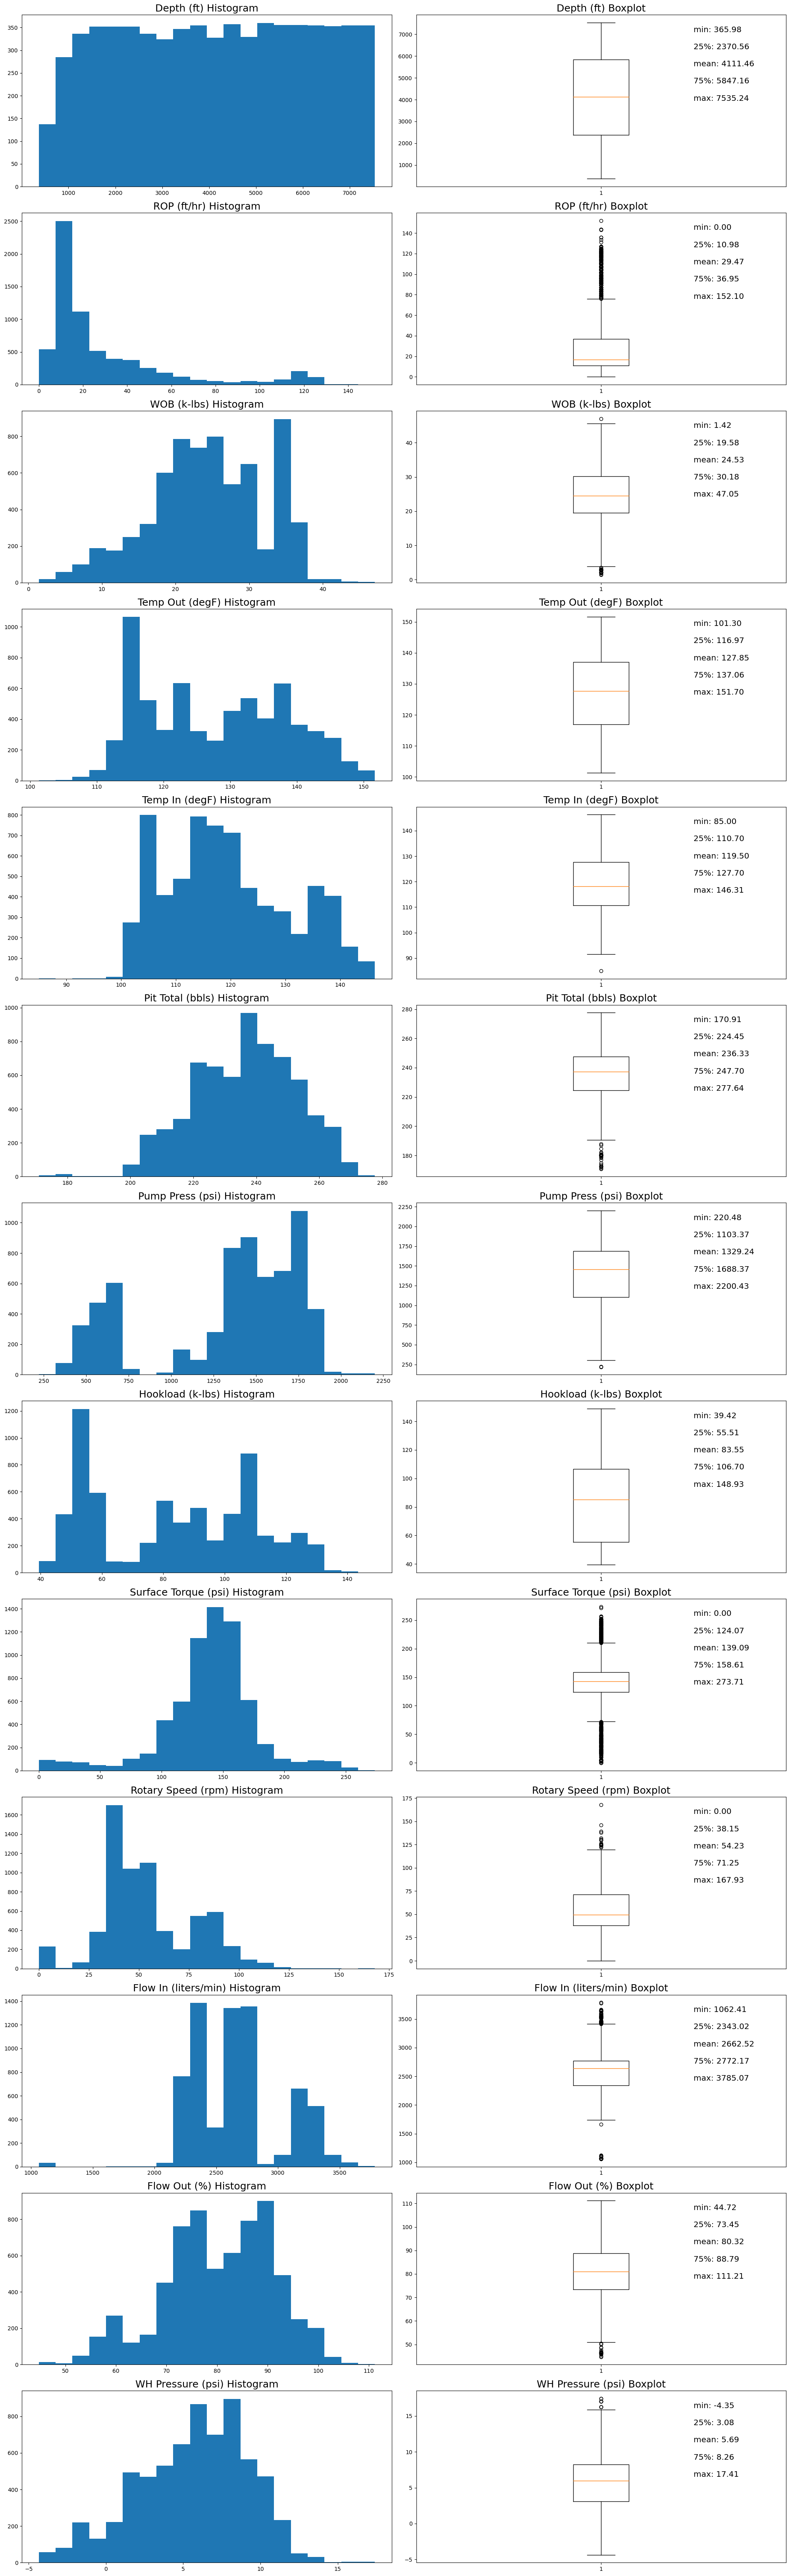

In [19]:
describe_df(df)

In [20]:
def custom_pairplot(dataframe, plot_style='scatter', diagonal_style='kde', main_title='Pairplot', secondary_title='Additional Details', **kwargs):
    import matplotlib.pyplot as plt
    import seaborn as sns

    numeric_columns = dataframe.select_dtypes(include='number').columns
    num_columns = len(numeric_columns)
    fig, axes = plt.subplots(num_columns, num_columns, figsize=(35, 35))

    for row_index, row_col in enumerate(numeric_columns):
        for col_index, col_col in enumerate(numeric_columns):
            if col_index > row_index:
                axes[row_index, col_index].axis('off')
                continue
            if row_index == col_index:
                if diagonal_style == 'hist':
                    axes[row_index, col_index].hist(dataframe[col_col], **kwargs)
                elif diagonal_style == 'kde':
                    sns.kdeplot(dataframe[col_col], ax=axes[row_index, col_index], **kwargs)
                else:
                    raise ValueError(f"Unsupported diagonal_style: {diagonal_style}. Use 'hist' or 'kde'.")
            else:
                if plot_style == 'scatter':
                    axes[row_index, col_index].scatter(dataframe[col_col], dataframe[row_col], alpha=0.1, **kwargs)
                else:
                    raise ValueError(f"Unsupported plot_style: {plot_style}. Currently, only 'scatter' is available.")
            if col_index == 0:
                axes[row_index, col_index].set_ylabel(row_col, fontsize=16)
            if row_index == num_columns - 1:
                axes[row_index, col_index].set_xlabel(col_col, fontsize=16)

    plt.tight_layout()
    plt.suptitle(main_title, fontsize=30, y=1.02)
    plt.figtext(0.1, 0.9, secondary_title, fontsize=12, color='gray')
    plt.show()


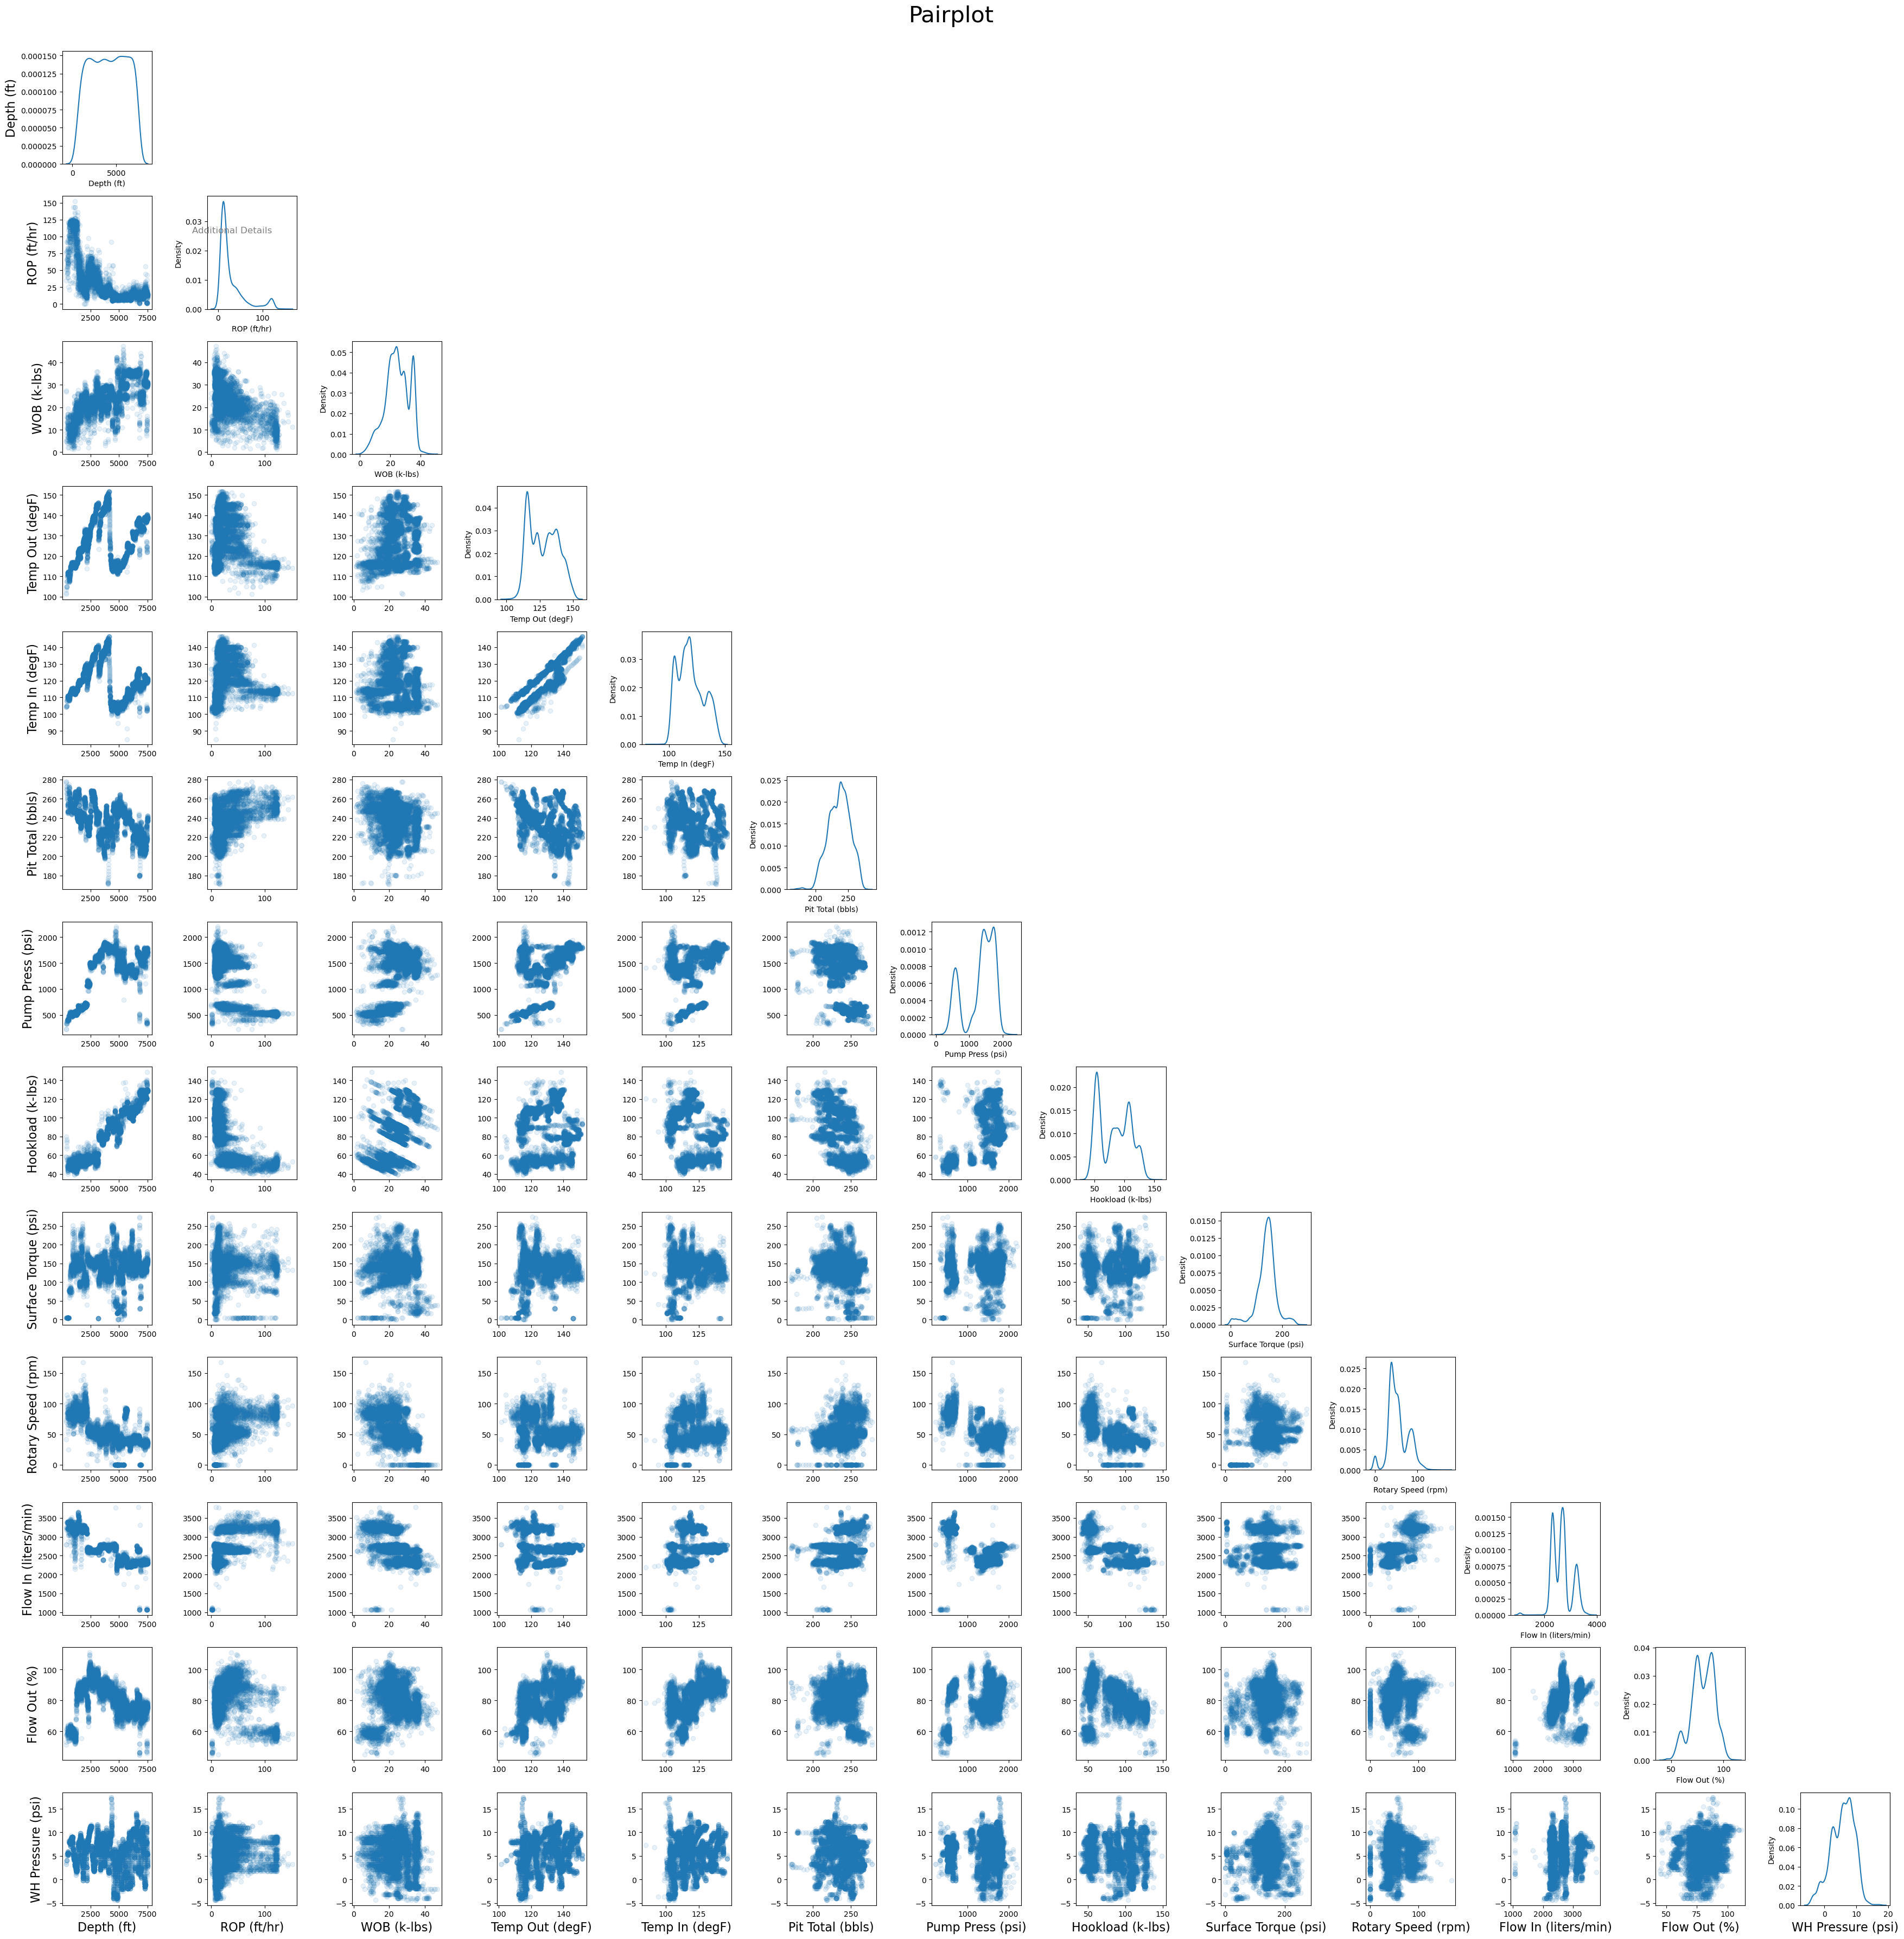

In [21]:
custom_pairplot(df)

<ipython-input-11-e49e1873a053>:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.5)


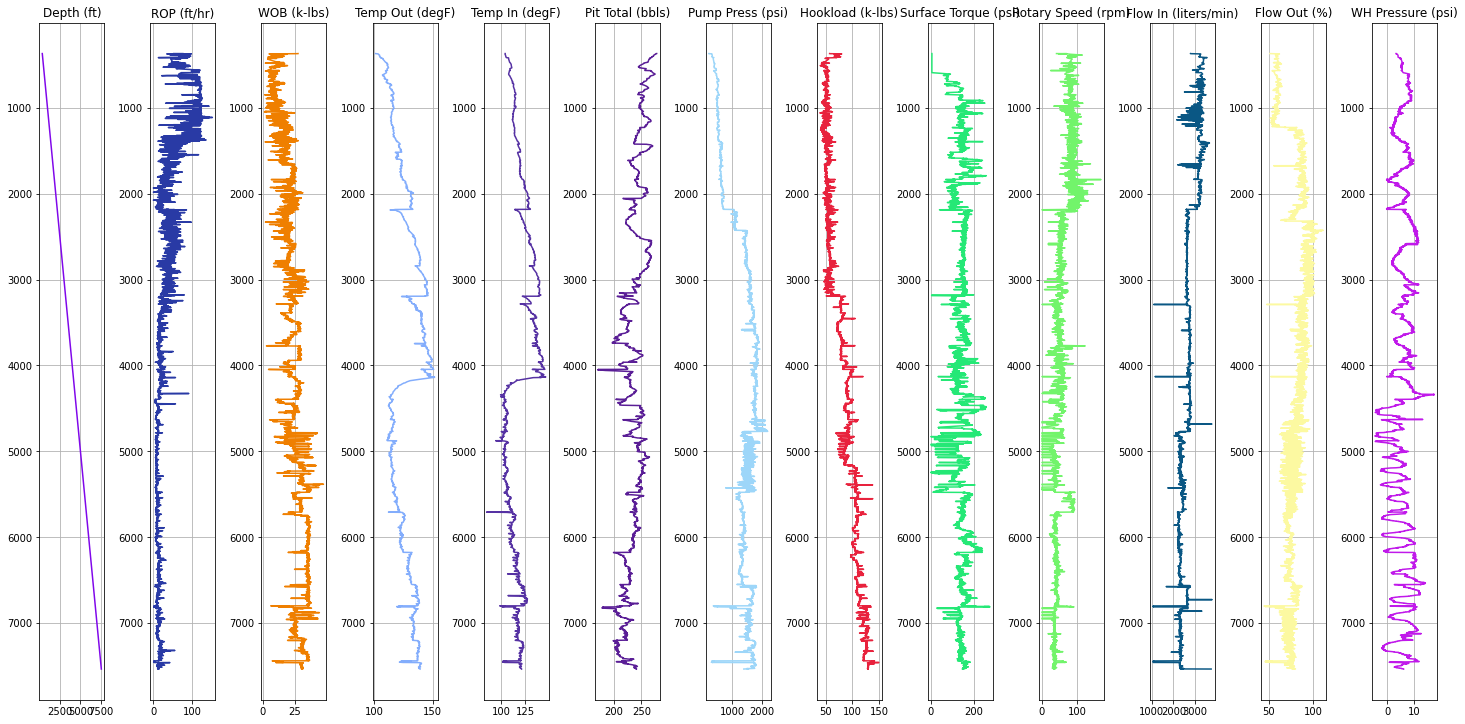

In [11]:
# Let's build a quick log display with depth as a reference
import randomcolor
def generate_colors(n):
    # Generate n random colors
    colors = randomcolor.RandomColor().generate(count=n)
    return colors

# define what data we wanna plot
logs = df.select_dtypes(include=["float64", "int64"]).columns
colors= generate_colors(len(logs))

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots
for i in range(len(logs)):
    ax[i].plot(df[logs[i]], df['Depth (ft)'], color=colors[i])
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].invert_yaxis()

plt.tight_layout(0.5)
plt.show()

##  Data preprocessing and feature engineering

In this specific case, let's compute some parameters to potentially improve models performance.
The **d-exponent** and the **specific energy** are two parameters that are used in drilling engineering to evaluate the drilling performance.

- **D-exponent**: The d-exponent is a dimensionless parameter that describes the rate of penetration (ROP) as a function of the weight on bit (WOB) and the rotary speed (RPM). It is defined as the slope of the log-log plot of ROP against WOB and RPM. The d-exponent is used to evaluate the drilling performance and to identify trends in the drilling performance. D-exponent values are typically between 0.5 and 2, with values closer to 2 indicating a more efficient drilling process.

- **Specific energy**: The specific energy is a measure of the energy required to cut a unit volume of rock. It is defined as the energy per unit volume of rock removed, and it is a function of the weight on bit (WOB), the rotary speed (RPM), the flow rate, and the rock properties. It is used to evaluate the rock cutting process and to identify trends in the drilling performance. Specific energy values are typically between 1 and 10, with lower values indicating a more efficient cutting process.

Both d-exponent and specific energy are key parameters to evaluate drilling performance and to identify trends in drilling performance. They are related to other drilling parameters such as ROP, drilling efficiency, drilling cost, drilling time, and drilling performance index (DPI). They also give insights on the rock cutting process, rock properties and drilling fluid properties. These parameters can be used to compare drilling performance between different drilling methods and different rock formations, and can be used to optimize drilling performance by selecting the best drilling parameters.

In [22]:
# Calculating some intresting parameters
def d_exponent(ROP, WOB, RPM, ROPo=1, Wo=1, RPMo=1):
    # This is the general formula
    # ROP: feet per hour (ft/hr) or meters per hour (m/hr)
    # WOB: pounds (lb) or kilonewtons (kN)
    # RPM: revolutions per minute (RPM)
    d = (np.log(ROP) - np.log(ROPo)) / (np.log(WOB) - np.log(Wo) + np.log(RPM) - np.log(RPMo))
    return d

def d_exponent_df(df, ROP_col='ROP', WOB_col='WOB', RPM_col='RPM', ROPo=1, Wo=1, RPMo=1):
    # This is how to implement it for a pandas DataFrame
    df['d_exponent'] = d_exponent(df[ROP_col], df[WOB_col], df[RPM_col], ROPo, Wo, RPMo)
    return df

C:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


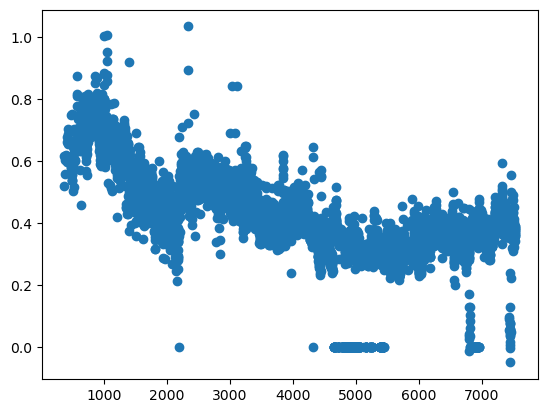

In [23]:
# Calling the function
d_exponent_df(df, ROP_col='ROP (ft/hr)', WOB_col='WOB (k-lbs)', RPM_col='Rotary Speed (rpm)')
plt.scatter(df['Depth (ft)'], df['d_exponent'])

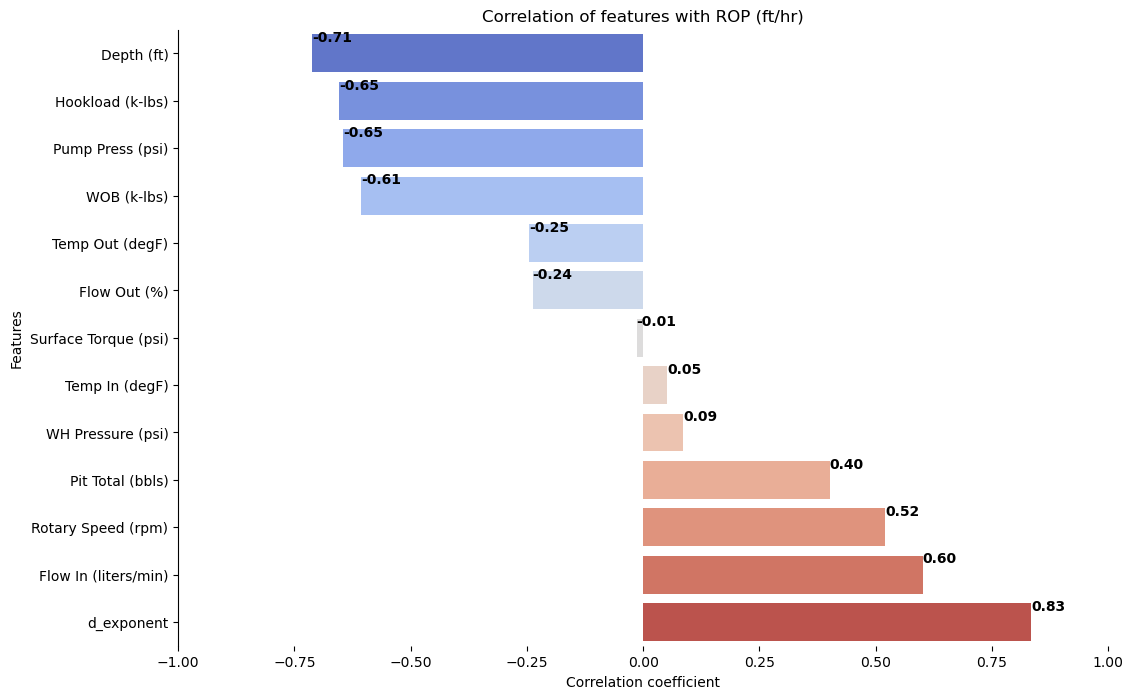

In [24]:
def plot_corr_to_target(df, target_col):
    corr = df.corr()[target_col].sort_values()
    corr = corr.drop(target_col)
    corr_top_2 = corr.nlargest(2)
    corr_bottom_2 = corr.nsmallest(2)
    corr_top_2_cols = corr_top_2.index.tolist()
    corr_bottom_2_cols = corr_bottom_2.index.tolist()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
    ax.set_title(f'Correlation of features with {target_col}')
    ax.set_xlabel('Correlation coefficient')
    ax.set_ylabel('Features')
    ax.set_xlim(-1, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    
    for i, (value, name) in enumerate(zip(corr, corr.index)):
        ax.text(value, i-.25, f'{value:.2f}', size=10, color='black', weight= 'bold')
    
    for patch in ax.containers:
        if patch.get_label() in corr_top_2_cols + corr_bottom_2_cols:
            patch.set_facecolor('#0066ff')

plot_corr_to_target(df, 'ROP (ft/hr)')

You see although that we 'D_exponent' correlates greatly with the 'ROP' we can not use it to train our models, because d_exponent in it self uses ROP to be computed. Although there are more advanced method enabling us to use it in real time, it's better to leave it for ROP interpretation rather than prediction. 

In [25]:
# let's drop the d_exponent
df.drop('d_exponent', axis =1, inplace=True)

# Feature selection and ranking
# Calculating correlation
corr = df.corr()

# Taking the absolute corr values because the essential thing is the degree
# of correlation and not being positive or negative
corr_target = abs(corr["ROP (ft/hr)"])
relevant_features = corr_target[corr_target>0.5]
df_filtered = df[relevant_features.index]

# Dropping the target parameter
df_filtered.drop("ROP (ft/hr)", axis=1, inplace=True)

C:\Users\nithi\AppData\Local\Temp\ipykernel_38548\4261083305.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop("ROP (ft/hr)", axis=1, inplace=True)


In [26]:
from sklearn.preprocessing import StandardScaler

# Standardization and normalization
scaler = StandardScaler()
scaler.fit(df_filtered.dropna())
df_scaled = scaler.transform(df_filtered)

##  Algorithm selection 

In [28]:
! pip install xgboost

     ------------------------------------ 124.9/124.9 MB 899.8 kB/s eta 0:00:00


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df["ROP (ft/hr)"], test_size=0.2)

# Initializing  models
# Linear Regression
reg = LinearRegression()
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100)
# Support vector regressor
svr = SVR()
# GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
# XGBRegressor model
xgb_reg = xgb.XGBRegressor()
# Simple Neural Network Regression
nn = MLPRegressor(hidden_layer_sizes=(30,10,1))

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": reg,
    "Polynomial Regression": None,
    "Random Forest Regression": rf,
    "Support Vector Regressor": svr,
    "Gradient Boosting Regressor": gbr,
    "XGBRegressor": xgb_reg,
    "Neural Network Regression": nn
}

results = {}

for name, model in models.items():
    if name == "Polynomial Regression":
        X_train_transformed = poly.fit_transform(X_train)
        X_test_transformed = poly.transform(X_test)
        reg_poly = LinearRegression()
        reg_poly.fit(X_train_transformed, y_train)
        y_pred = reg_poly.predict(X_test_transformed)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Linear Regression:
MAE: 13.5324
MSE: 339.0739
RMSE: 18.4140
R2: 0.6001

Polynomial Regression:
MAE: 8.5957
MSE: 163.7895
RMSE: 12.7980
R2: 0.8068

Random Forest Regression:
MAE: 4.4014
MSE: 66.8919
RMSE: 8.1787
R2: 0.9211

Support Vector Regressor:
MAE: 7.5248
MSE: 159.5181
RMSE: 12.6300
R2: 0.8119

Gradient Boosting Regressor:
MAE: 5.4510
MSE: 80.3531
RMSE: 8.9640
R2: 0.9052

XGBRegressor:
MAE: 5.0619
MSE: 82.8541
RMSE: 9.1024
R2: 0.9023

Neural Network Regression:
MAE: 22.4051
MSE: 1345.1641
RMSE: 36.6765
R2: -0.5866


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
Models = list(results.keys())
R_squared_results = [metrics["R2"] for metrics in results.values()]

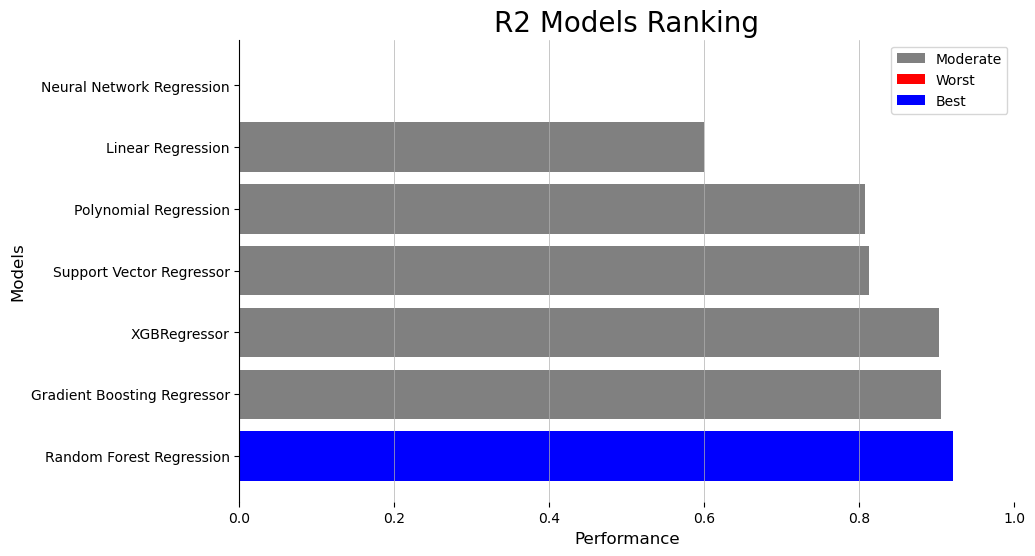

In [34]:
def rank_bar_plot(param_names, param_values, title='R2 Models Ranking', xlabel='Performance', ylabel='Models', 
                  fontsize=12, rotation=0, grid=True, legend=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    param_values, param_names = zip(*sorted(zip(param_values, param_names), key=lambda x: x[0], reverse=True))
    ax.barh(param_names, param_values, color='grey')
    ax.barh(param_names[-1], param_values[-1], color='red')
    ax.barh(param_names[0], param_values[0], color='blue')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xlim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.yticks(rotation=rotation)
    if grid:
        ax.grid(linestyle='-', linewidth=0.5, axis='x')
    if legend:
        ax.legend(['Moderate', "Worst", "Best"])
    plt.show()

rank_bar_plot(Models, R_squared_results)


 Well it seems that Linear regression has performed the worst in the specific case (but it's case dependent), Random Forest barely out-performs XGB and GBR. They fall around 90% which is really good. 

In [ ]:
from sklearn.model_selection import GridSearchCV

models_params = {
    "Support Vector Regression": {
        "model": svr,
        "param_grid": {
            "C": [0.1, 1, 10],
            "gamma": [0.01, 0.1, 1],
            "kernel": ["linear", "rbf"]
        }
    },
    "Gradient Boosting": {
        "model": gbr,
        "param_grid": {
            "n_estimators": [100, 500, 1000],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.1, 0.01, 0.001]
        }
    }
}

best_params_results = {}
r2_results = {}

for name, details in models_params.items():
    grid_search = GridSearchCV(details["model"], details["param_grid"], cv=5, scoring="r2")
    grid_search.fit(X_train, y_train)
    best_params_results[name] = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    r2_results[name] = r2_score(y_test, y_pred)

for name in best_params_results:
    print(f"\n{name}:")
    print(f"Best Parameters: {best_params_results[name]}")
    print(f"R2 Score: {r2_results[name]:.4f}")


Well **SVR** performed relatively better this time but such is not the case for **Gradient Boosting**. 